# Advanced Statistic -- Exercize Sheet 4

Valente Alessandro 1234429


## Ex 4.1

The triangular distribution, in the interval (a, b), is given by the following:

$$f(X)=\left\{\begin{array}{cl}
\frac{2(x-a)}{(b-a)(c-a)} & a \leq x<c \\
\frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b \\
0 & \text { otherwise }
\end{array}\right.$$

where $c \in [a, b]$


**a)** plot the function, given the interval (a, b)

From this formulation the PDF is already normalized so we can integrate it to obtain the CDF

$$F(x)=\left\{\begin{array}{ll}
\frac{(x-a)^{2}}{(b-a)(c-a)} & a<x<c \\
1-\frac{(x-b)^{2}}{(b-a)(b-c)} & c \leq x<b
\end{array}\right.$$

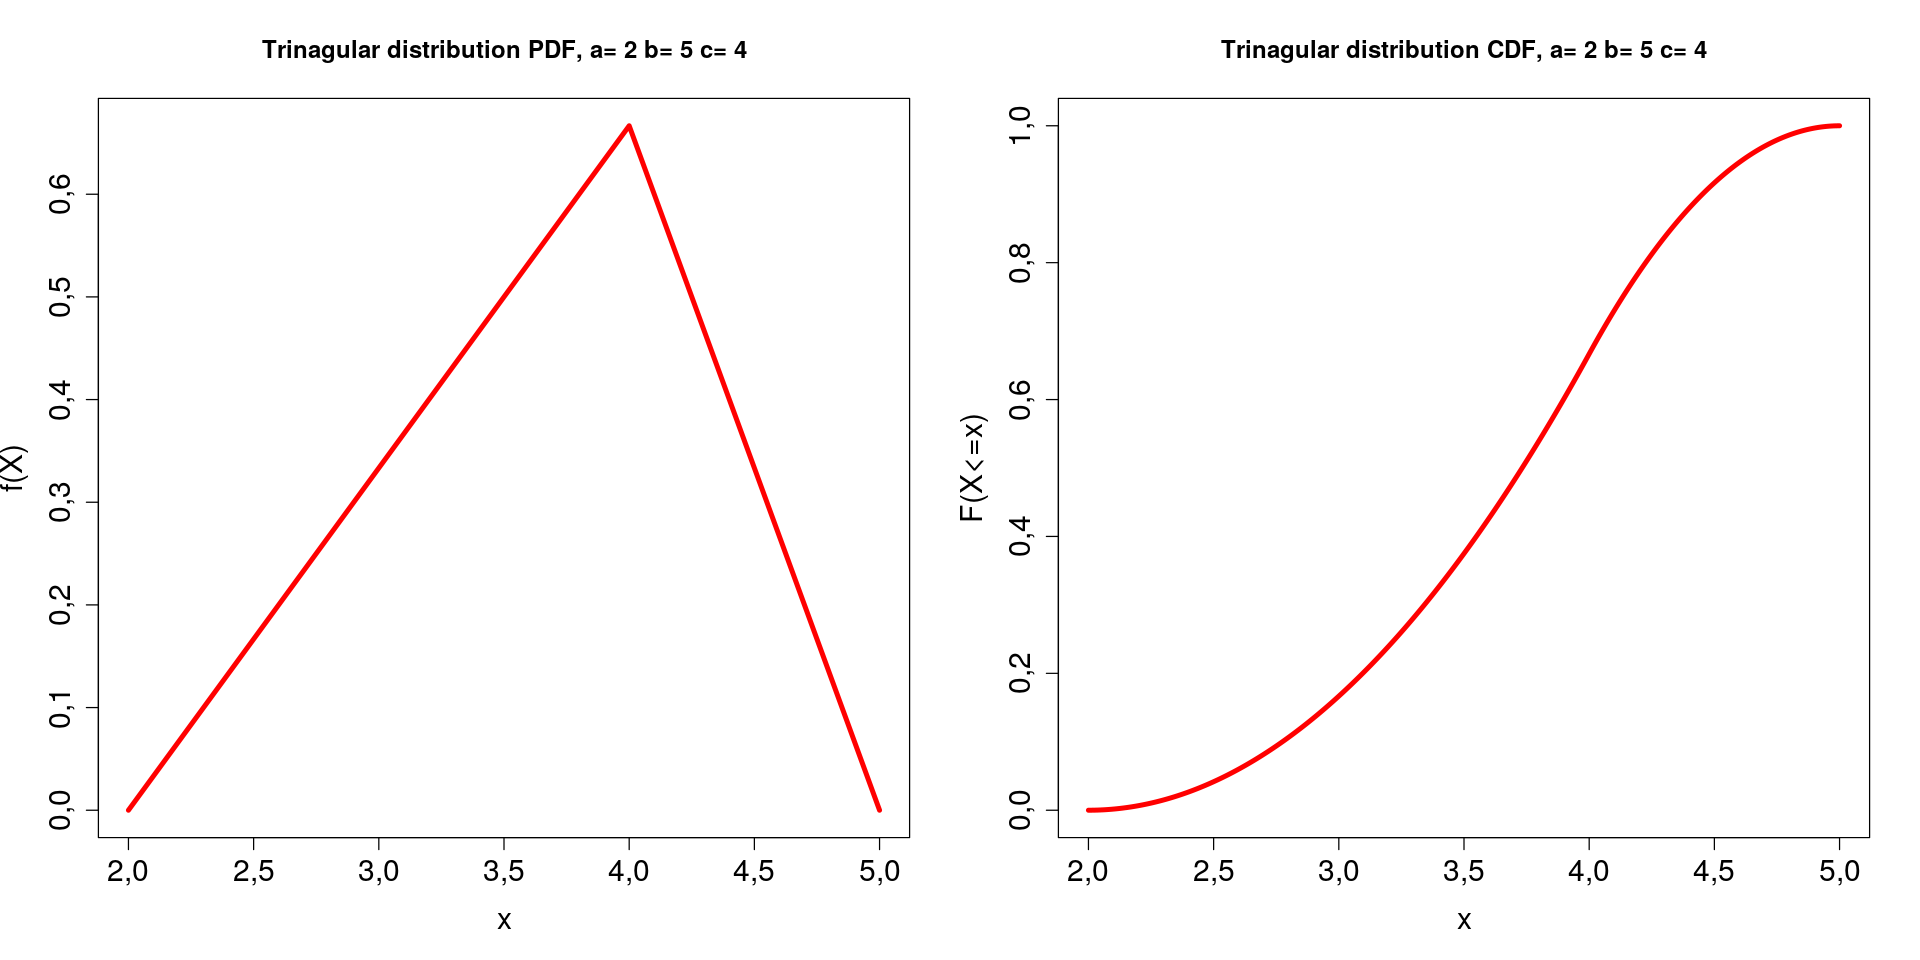

In [1]:
a <- 2
b <- 5
c <- 4#seq(a, b, 0.5)

dtriang <- function(x, a=0, b=1, c=0.5){
    f <- ifelse(x<a | x>b, 0,
               ifelse(x<c, 2*(x-a)/((b-a)*(c-a)), 2*(b-x)/((b-a)*(b-c)) ))
    return (f)
}

ptriang <- function(x, a=0, b=1, c=0.5){
    f <- ifelse(x<a | x>b, ifelse(x<a,0,1),
               ifelse(x<c, (x-a)^2/((b-a)*(c-a)), 1-(b-x)^2/((b-a)*(b-c)) ))
    return (f)
}


options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)


x <- seq(a,b,0.001)


 plot(x, dtriang(x,a,b,c), cex.lab=1.5, cex.axis=1.5, type = "l" ,  
  lwd=4, col= 'red',  xlim=c(a,b), ylab='f(X)', 
  main=paste("Trinagular distribution PDF, a=",a,"b=",b, "c=",c))

 
     
plot(x, ptriang(x,a,b,c), cex.lab=1.5, cex.axis=1.5, type = "l" ,  
     lwd=4, col='red', xlim=c(a,b), ylab='F(X<=x)', 
     main=paste("Trinagular distribution CDF, a=",a,"b=",b, "c=",c))


**b)** and write an algorithm to generate random numbers from the triangular distribution


It is possible to generate random numbers in two different ways:

- Inverting the CDF to obtain the quantile function, in this way we can sample using the quantile

$$F^{-1}(q)=\left\{\begin{array}{ll}
a+\sqrt{(b-a)(c-a) q} & 0<q<\frac{c-a}{b-a} \\
b-\sqrt{(b-a)(b-c)(1-q)} & \frac{c-a}{b-a} \leq q<1
\end{array}\right.$$

- Generating random numbers in the domain $[a,b]x[0,\frac{2}{b-a}]$, where $\frac{2}{b-a}$ is the maximum of the distribution and then apply the rejection sampling method

In [2]:
#define the quantile function (analytically)
qtriang <- function (q, a=0, b=1, c=0.5){
    f <- ifelse(q<0 | q>1, NA,
               ifelse(q< (c-a)/(b-a), 
                      a+ sqrt((b-a)*(c-a)*q), 
                      b- sqrt((b-a)*(b-c)*(1-q)) ))
    return (f)
}
#sample using quantile
rtriang <- function (n, a=0, b=1, c=0.5){
    return(qtriang(runif(n), a,b,c))
}
#sample by rejection method
rtriang2 <- function (n,a=0, b=1, c=0.5){
    #generate random numberss
    x <- runif(n*2,a,b)
    y <- runif(n*2, 0, 2/(b-a))
    #reject the one "outside"
    x <- x[dtriang(x,a,b,c)>y]
    #loop until enough numbers are reached
    while (length(x)<n){
        #generate the double of the missing numbers (to be faster)
        x2 <-runif((n-length(x))*2,a,b) 
        y2 <-runif((n-length(x))*2, 0, 2/(b-a))
        #reject
        x2 <- x2[dtriang(x2,a,b,c)>y2]
        #concatenate to the previos accepted samples
        x <- c(x,x2)
    }
    return(x[1:n])
}

**c)** generate $10^4$
random number from the distribution, show them in an histogram and superimpose
the analytical curve

The normalization factor to match the PDF to the histogram should be the area of the histogram itself, this can be computed as the mean value of the histogram times the interval, in fact
$$
A=\sum_{i=1}^{N_{bins}} n_i*w_i
$$

where $n_i$ is the value of a bin and $w_i$ it's width, then since the bins are all of the same size we have

$$
w_i = \frac{b-a}{N} \implies A=\sum_{i=1}^{N_{bins}}n_i *\frac{b-a}{N}\\
\qquad\qquad\qquad=(b-a)\sum_{i=1}^{N_{bins}}\frac{n_i}{N}
$$


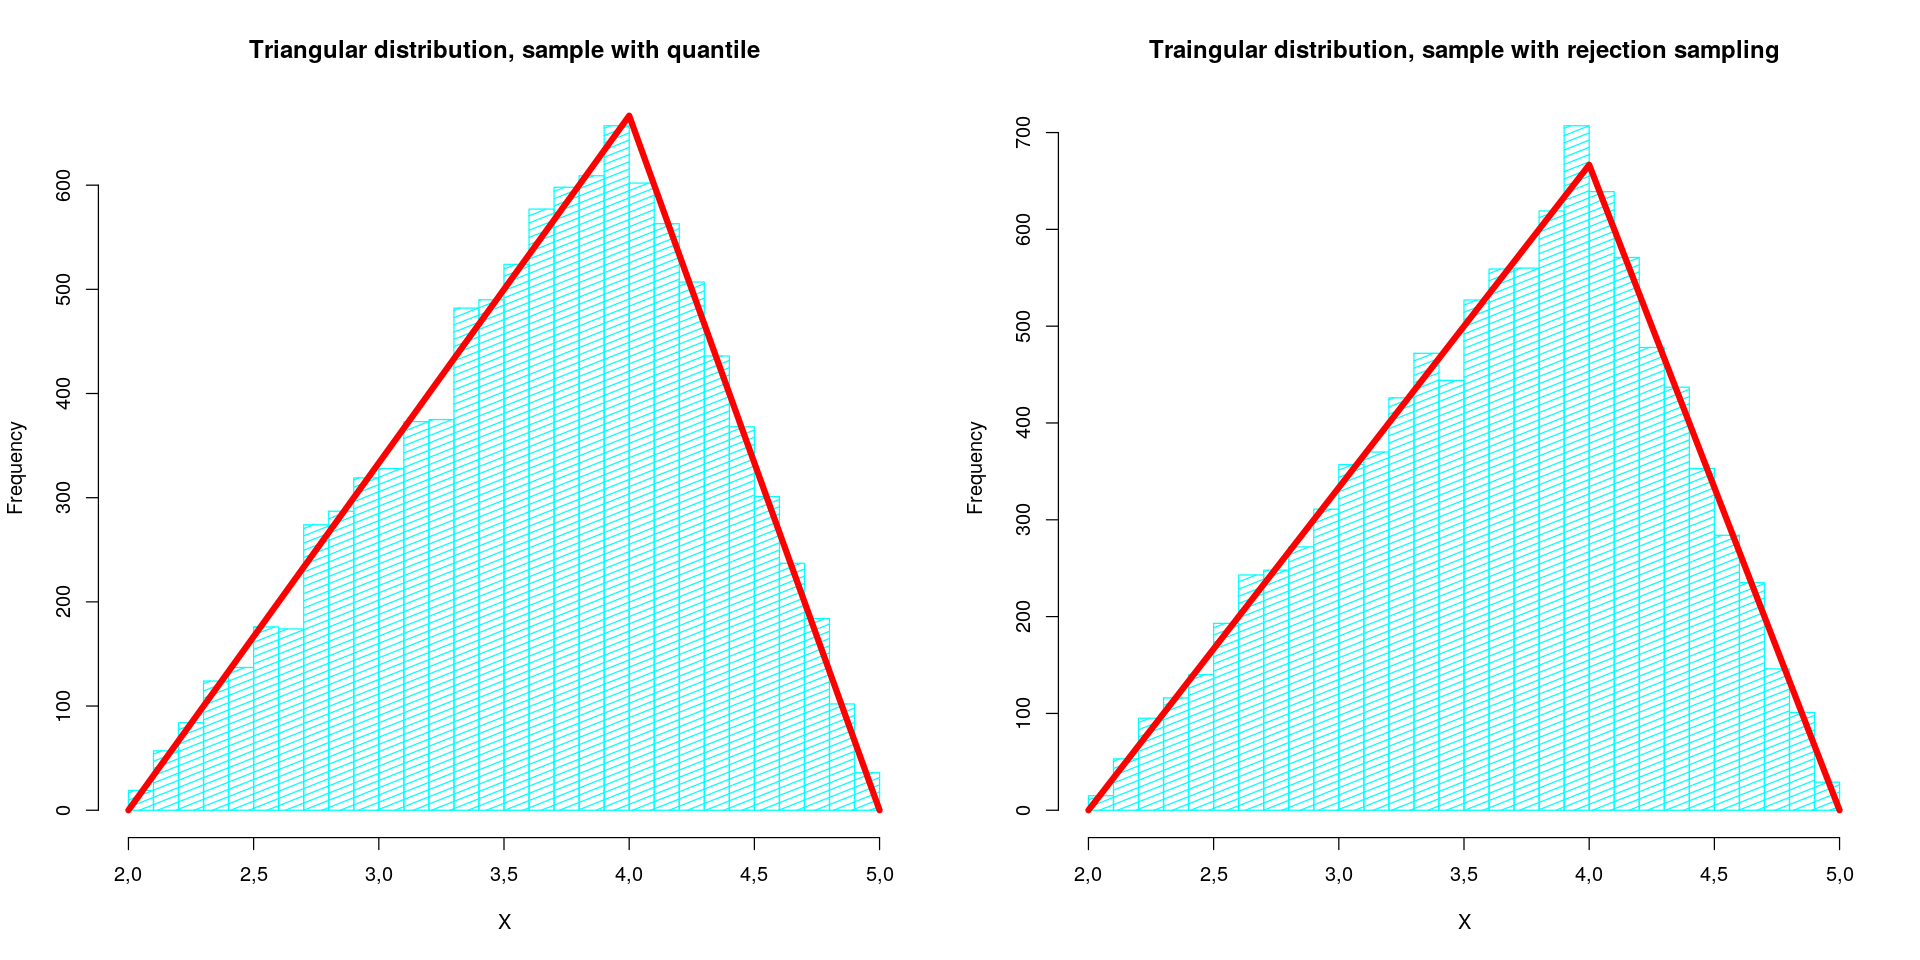

In [3]:
options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

x<- seq(a,b, 0.001)
nb <- 30
h <- hist(rtriang(10000,a,b,c),xlim=c(a,b), breaks=nb,
          main="Triangular distribution, sample with quantile",
          xlab="X", col='cyan', density =30)
area <- mean(h$counts)*(b-a) 
lines(x, dtriang(x,a,b,c)*area, lwd=5, col='red')

h <- hist(rtriang2(10000,a,b,c),xlim=c(a,b), breaks=nb,
          main="Traingular distribution, sample with rejection sampling",
          xlab="X", col='cyan', density =30)
area <- mean(h$counts)*(b-a) 
lines(x, dtriang(x,a,b,c)*area, lwd=5, col='red')

## Ex.2

given a discrete probability distribution, defined by the following probabilities: 0.05, 0.19, 0.14,
0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17

**a)** plot the probability density function and the cumulative density function

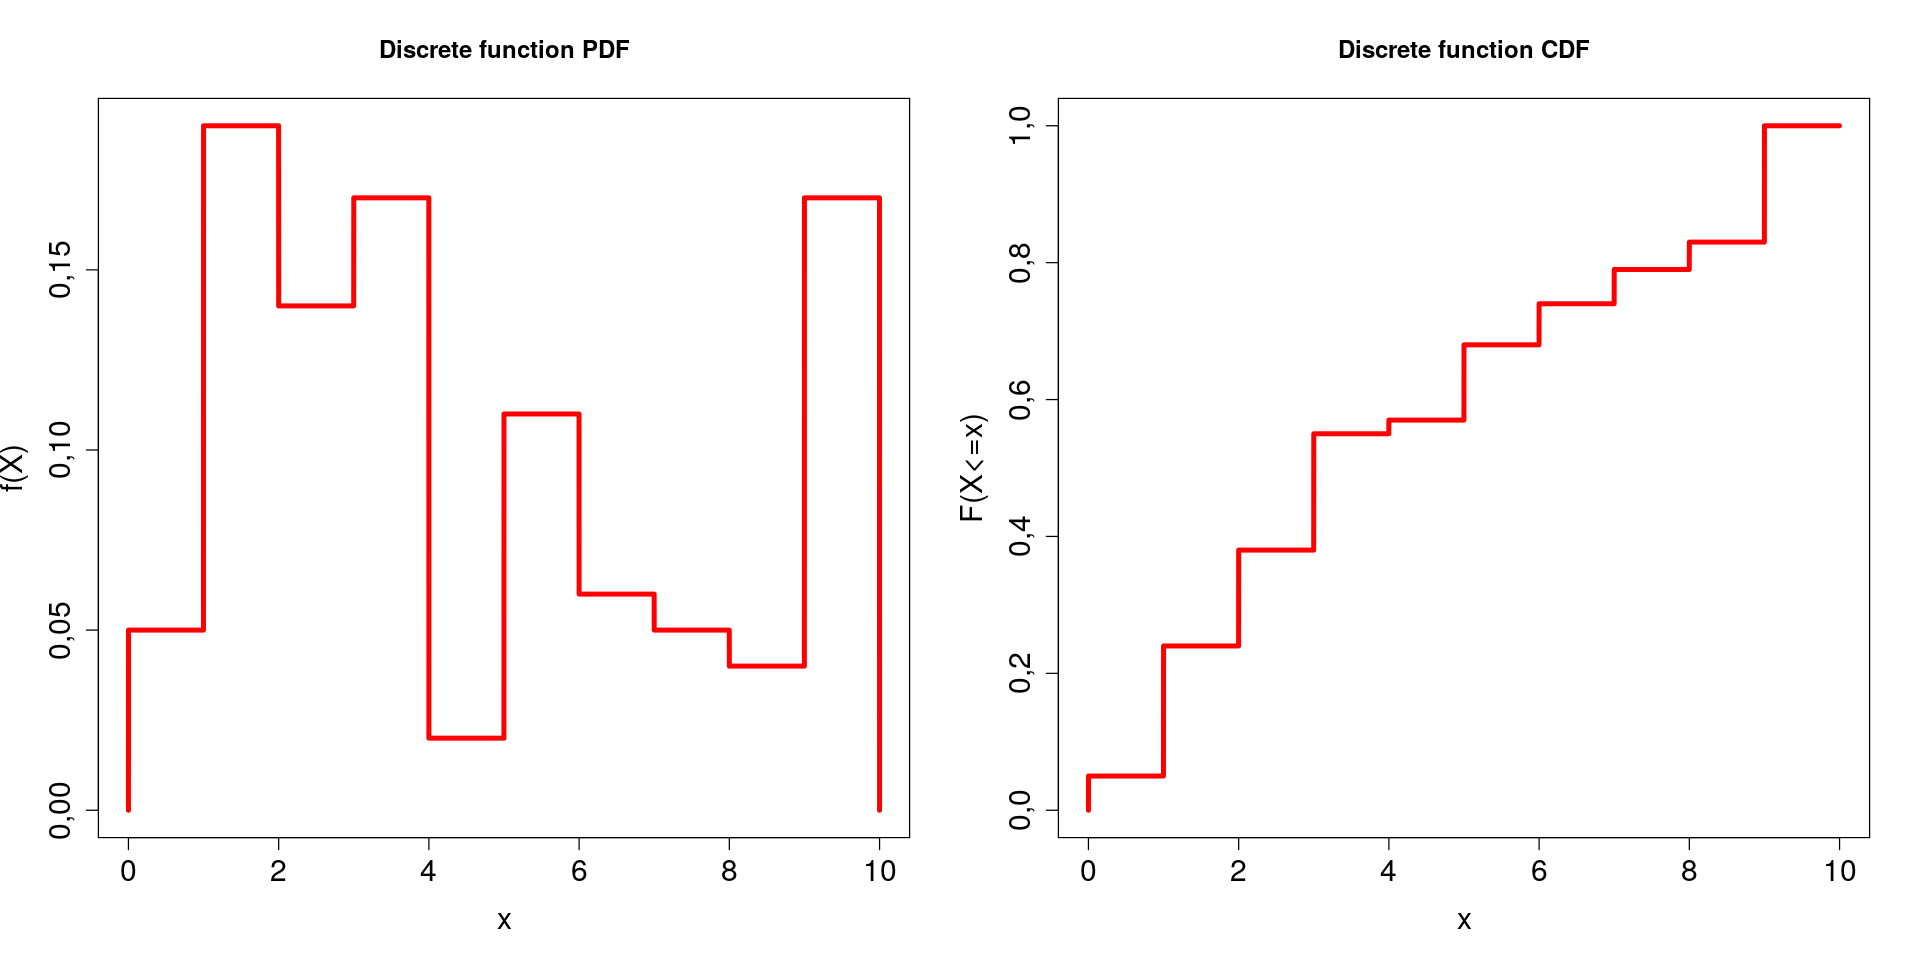

In [4]:
probs <- c(0.05, 0.19, 0.14, 0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17)
#i can compute before hand the values of the CDF by cumulatively summing the probabilities
cum_probs <- cumsum(probs)
dprob <- function(x){
    ifelse(x<=0 | x>= length(probs), 0, probs[as.integer(x+1)])
}
pprob <- function(x){
    ifelse(x<=0 | x>= length(probs)+1, ifelse(x<=0,0,1), cum_probs[as.integer(x+1)] )
   # sum(probs[1:as.integer(x+1)])
}

options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

x <- seq(0,10,0.001)
plot(x, dprob(x), cex.lab=1.5, cex.axis=1.5, type = "l" ,  
     lwd=4, col='red',  xlim=c(0,10), ylab='f(X)', main="Discrete function PDF") 
     
plot(x, pprob(x), cex.lab=1.5, cex.axis=1.5, type = "l" ,  
     lwd=4, col='red', xlim=c(0,10), ylab='F(X<=x)', main="Discrete function CDF")


**b)** write an algorithm to generate random numbers from the discrete probability distribution

As for the **Ex 1.b** is possible to generate the random numbers from this PDF in two way:
- inverting the CDF, which in this case is not convienient to do be done analytically but with an interval finding function since the CDF is discrete
- as before using the rejection sampling method

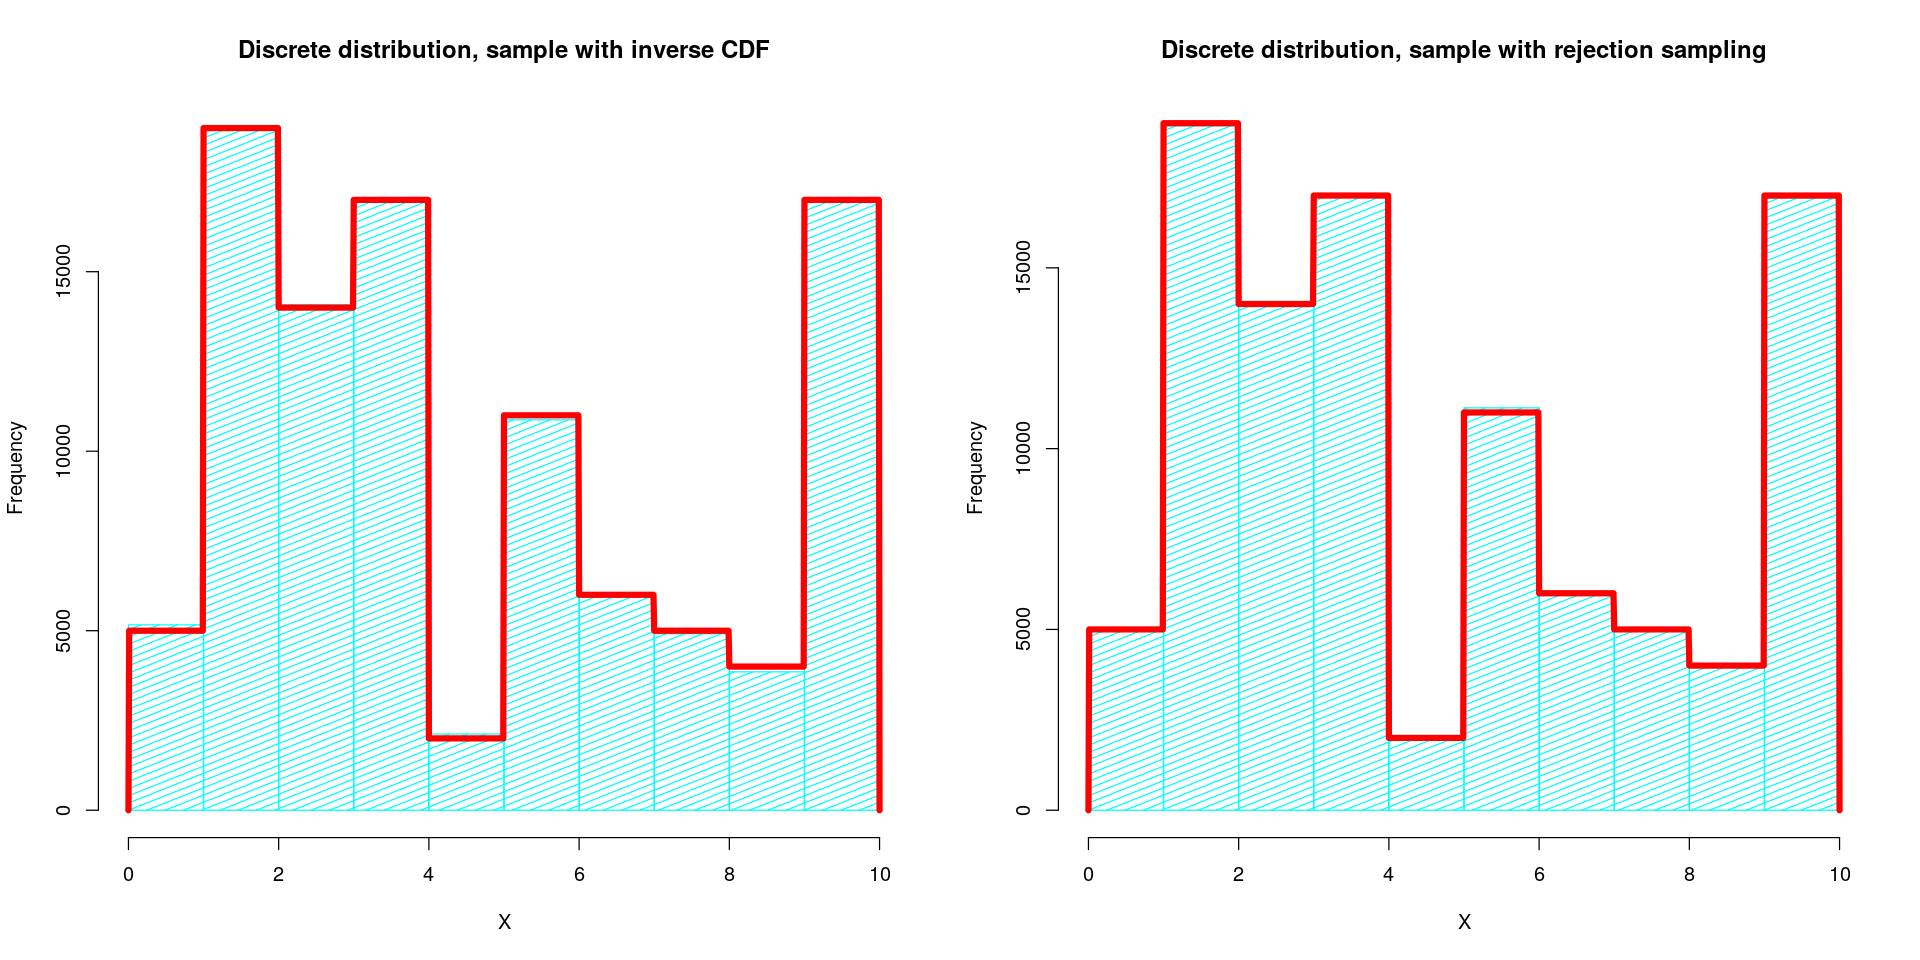

In [5]:
options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)
#sample by CDF inverse
rprob <- function(n){
    u <-runif(n)
    #the findInteval function does what the quantile function would do
    #it find the inverval to which the u sample belongs and returns it
    return (findInterval(u, cum_probs))
}
#sampling by rejection method
rprob2 <- function (n){
    x <- runif(n*2,0, length(probs))
    y <- runif(n*2, 0, max(probs))
    x <- x[dprob(x)>y]
    while (length(x)<n){
        x2 <-runif((n-length(x))*2,0, length(probs))
        y2 <-runif((n-length(x))*2,0,    max(probs))
        x2 <- x2[dprob(x2)>y2]
        x <- c(x,x2)
    }
    return(as.integer(x[1:n]))
}


# NB the data in the histograms are the sample generated by the 2 functions
# and as we can see they fit perfectly the PDF but in the hist call i summed 0.001 to their values
# this is because the numbers are integer and so generated in the border of the histograms bin,
# causing the histogram to not plot them correctly, in this way the problem is solved 
# since they are not in the bordere anymore
# the other option would be to just plot using barplot 
x<- seq(0,10, 0.01)
nb <- 10
h <- hist(rprob(100000)+0.001,xlim=c(0,10), breaks=nb,
          main="Discrete distribution, sample with inverse CDF",
          xlab="X", col='cyan', density=30)
area <- mean(h$counts)*(length(probs)) 
lines(x, dprob(x)*area, lwd=5, col='red')


h <- hist(rprob2(100000)+0.001,xlim=c(0,10), breaks=nb,
          main="Discrete distribution, sample with rejection sampling",
          xlab="X", col='cyan', density=30)
area <- mean(h$counts)*(length(probs)) 
lines(x, dprob(x)*area, lwd=5, col='red')




## Ex 3

Generate random variables from the following distribution
$$f(X)=\frac{2}{\pi R^{2}} \sqrt{R^{2}-x^{2}}$$

 where $ −R ≤ x ≤ R$
 
**a)** using the acceptance-rejection algorithm, assume $M = \frac{2}{\pi R}$ and generate $10^4$
random variables,
plotting them in an histogram

The code below defines 2 funcitons:
- dsemisphere: which computes the PDF of the distribution
- rsemisphere: which samples using the rejection method in this function number in the interval $[-R,R]x[0,\frac{2}{\pi R^2}]$ are generated and then accepted or rejected

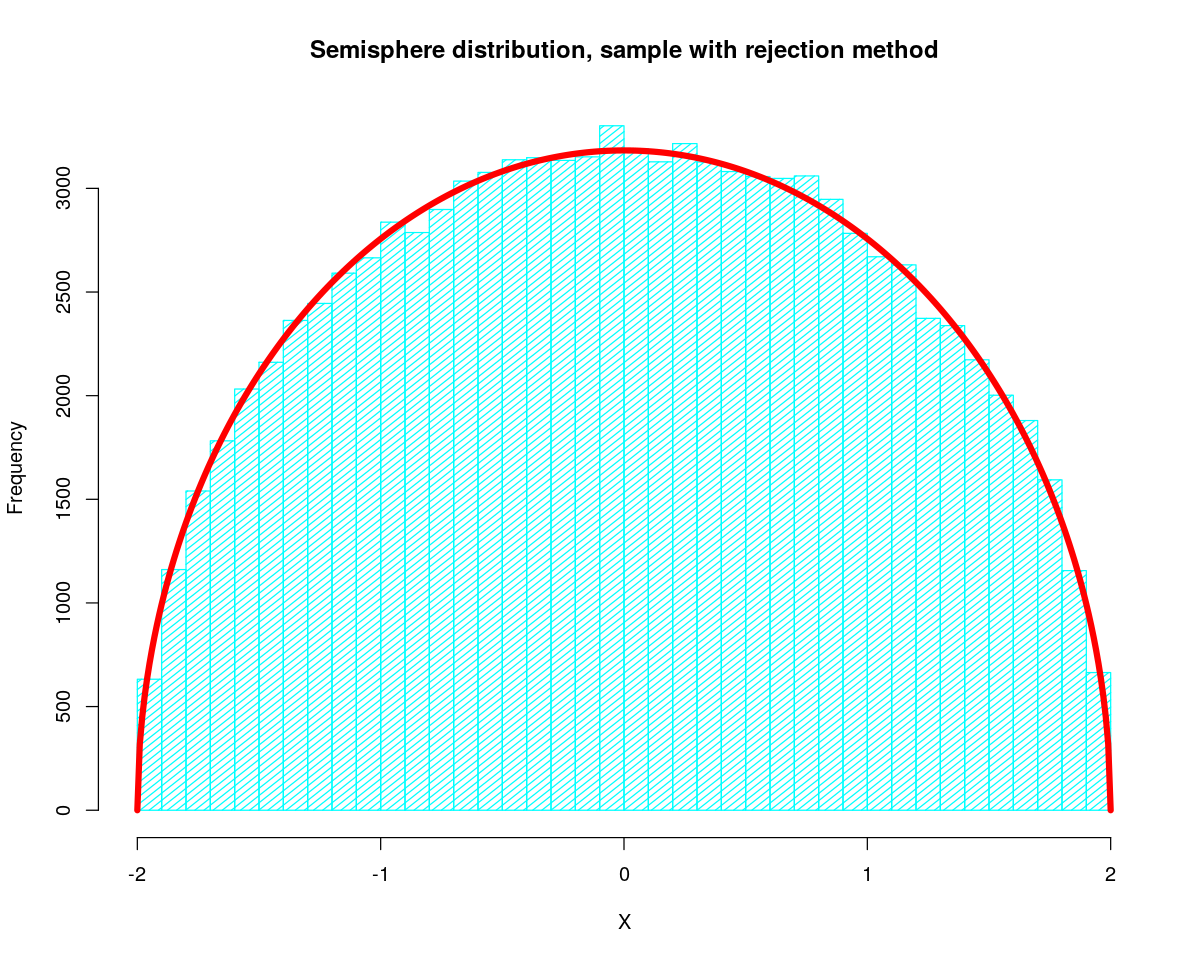

In [6]:
dsemisphere <- function(x, R=1){
    ifelse(x<=R & x>=-R, 2*sqrt(R^2-x^2)/(pi*R^2), 0)
}

rsemisphere <- function(n, R=1){
    M <- 2/(pi*R)
    #generate random numbers
    x <- runif(n*2,-R, R)
    y <- runif(n*2, 0, M)
    #accept only the ones "below the PDF"
    x <- x[dsemisphere(x, R)>y]
    #loop until enough smaplles are made
    while (length(x)<n){
        #generate double the missing samples
        x2 <-runif((n-length(x))*2,-R, R)
        y2 <-runif((n-length(x))*2, 0, M)
        # rejection and concatenation to the previous accepted
        x2 <- x2[dsemisphere(x2, R)>y2]
        x <- c(x,x2)
    }
    return(x[1:n])
}

options(repr.plot.width=10, repr.plot.height=8)
R <- 2
x<- seq(-R, R, 0.01)
nb <- 40
h <- hist(rsemisphere(100000, R),xlim=c(-R,R), breaks=nb,
          main="Semisphere distribution, sample with rejection method",
          xlab="X", col='cyan', density=30)
area <- mean(h$counts)*2*R #2R is the interval lenght
lines(x, dsemisphere(x, R)*area, lwd=5, col='red')

## Ex 4

An important property of the gamma distribution is the so-called reproductive property
given a sequence of independent random variable $X_j ∼$ Gamma$(αj , β)$, it follows that

$$Y=\sum_{j=1}^{n} X_{j} \rightarrow Y \sim \operatorname{Gamma}(\alpha, \beta) \quad \text { where } \quad \alpha=\sum_{j=1}^{n} \alpha_{j}$$

if $α = m$ is an integer, a random variable from gamma distribution Gamma$(m, β)$ (also known
as Erlang distribution) can be obtained by summing m independent exponential random variables
$X_j ∼ $Exp$(β)$:

$$Y=\beta \sum_{j=1}^{n}\left(-\ln U_{j}\right)=-\beta \ln \prod_{j=1}^{n} U_{j}$$

**a)** write an algorithm to sample variables from an Erlang distribution Gamma$(m, β)$

In the code below the **rErlang** function generates the ***n*** samples by generating a matrix ***n x m*** each row represents a set of data which will become a sample, after this the product of all the elements per row and the logarithm are computed giving the samples using the formulation:
$$Y=-\beta \ln \prod_{j=1}^{n} U_{j}$$

It's possible to genarate the samples also using the equivalent formula

$$Y=\beta \sum_{j=1}^{n}\left(-\ln U_{j}\right)$$

by doing first the logarithm and then summing but this will require more time since it would increase the number of operations needed.

The sampled data are then confronted to the Gamma distribution PDF from the R distribution

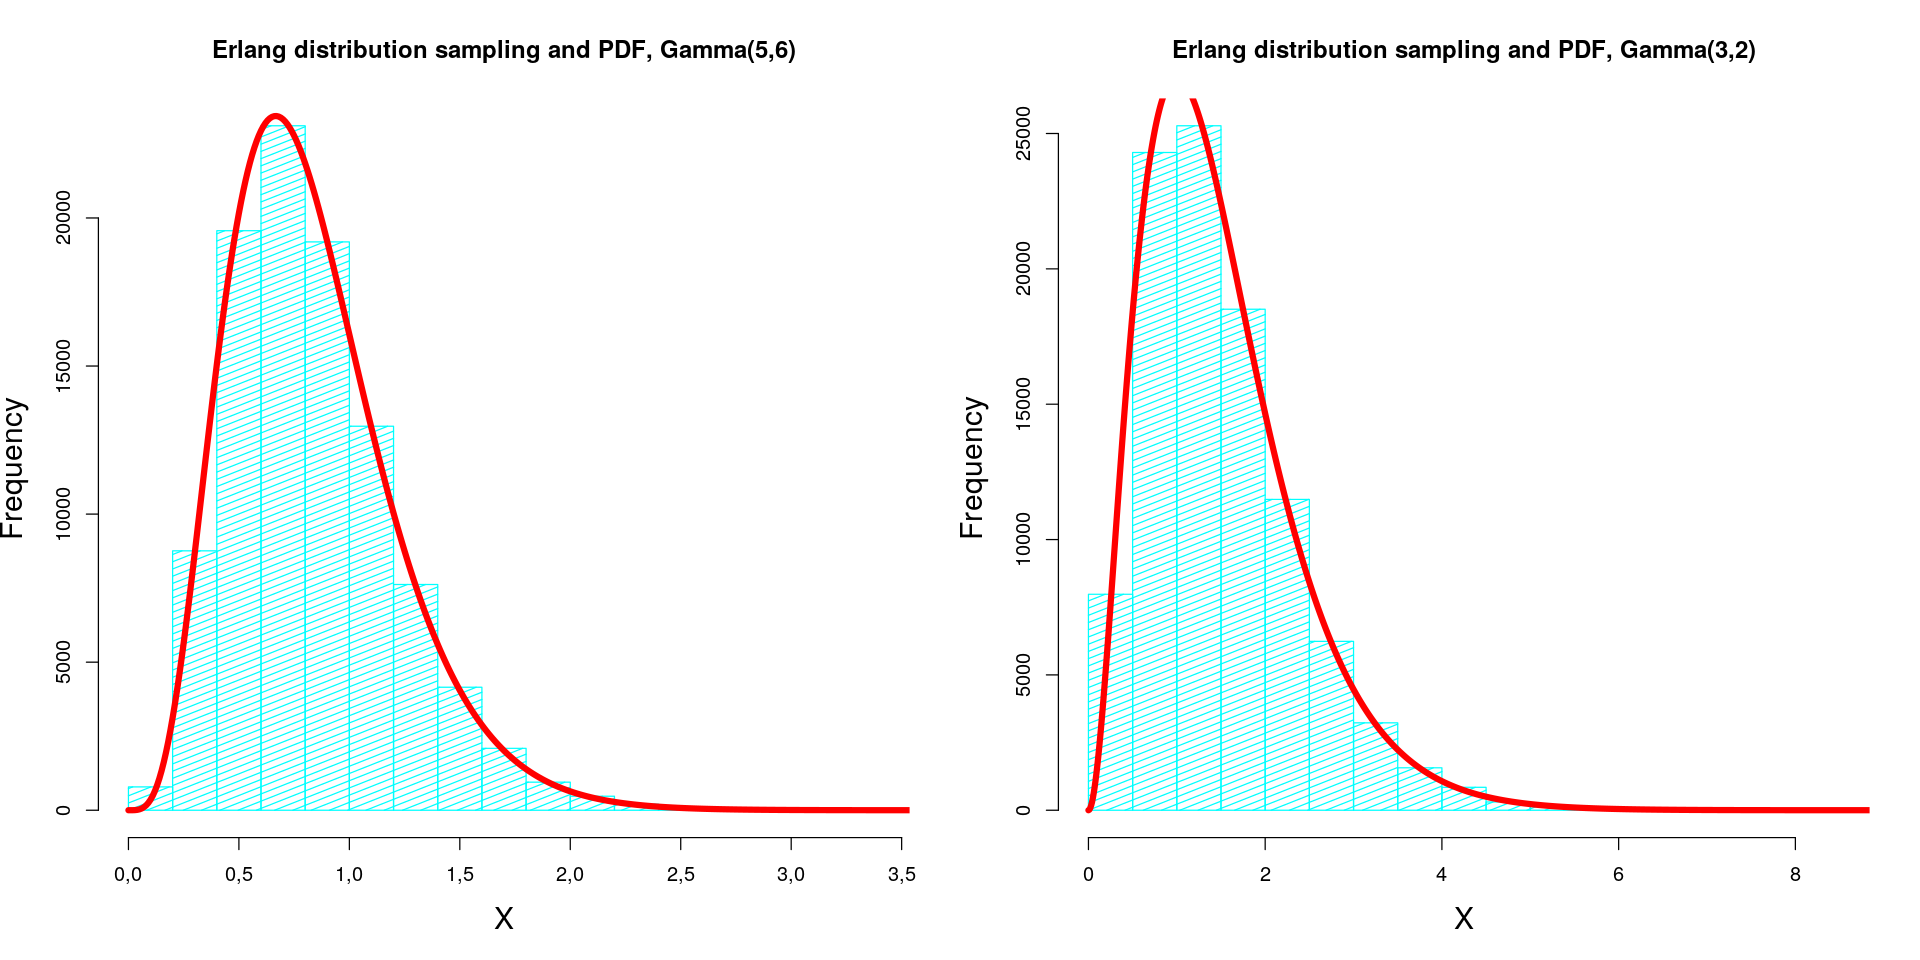

In [7]:
rErlang <- function(n, m , beta){
    #generate random matrix, each row will be a sampled data
    u <- matrix(runif(m*n), nrow=n, ncol=m)
    #apply the product to each row and compute y
    u <- apply(u, MARGIN = 1, prod)
    y <- -log(u)/beta
    # y<- -beta*apply(log(u), 1, sum) #equivalent but maybe the other is faster 
    return(y)
}

options(repr.plot.width=8, repr.plot.height=8)


options(repr.plot.width=16, repr.plot.height=8)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)
x <- seq(0,14, 0.01)
h<-hist(rErlang(100000, 5, 6), cex.lab=1.5,main="Erlang distribution sampling and PDF, Gamma(5,6)",
          xlab="X", col='cyan', density=30)
#faccio l'integrale come somma per larghezza dei bin
area <- sum(h$counts)*(h$breaks[2]-h$breaks[1])
lines(x, dgamma(x, 5,6)*area, lwd=5, col='red')

h<-hist(rErlang(100000, 3, 2), cex.lab=1.5, main="Erlang distribution sampling and PDF, Gamma(3,2)",
          xlab="X", col='cyan', density=30)
#faccio l'integrale come somma per larghezza dei bin
area <- sum(h$counts)*(h$breaks[2]-h$breaks[1])
lines(x, dgamma(x, 3, 2)*area, lwd=5, col='red')


## Ex.5

One of the first random number generator was proposed by von Neumann, the so-called middle
square algorithm
Write R code to implement this type of generator and, given a fixed digit number input, square it
an remove the leading and trailing digits, in order to return a number with the same number of
digits as the original number

In the code below the middle_square funciton follows this algorithm to generate data, in particular it follows this steps:
- converts the number squared to string
- trims half of the digits to be removed from the front and then takes a numbers of digits equal to the starting number
- converts the digits to a number, saves it and start again

In [8]:
middle_square <- function (n, x){
    nd <- length(unlist(strsplit(as.character(x),"")))
    rnd <- vector('numeric', n)
    for (i in 1:n){
        #square and go to chars
        x_sq <- unlist(strsplit(as.character(x^2),""))
        #elimnate first digits
        x_new <- x_sq[-(1:as.integer(nd/2))]
        #convert nd digits back 
        x <- as.numeric(paste(x_new[1:nd], collapse=""))
        if(is.na(x)) return(rnd)
        rnd[i] <- as.numeric(paste(x_new[1:nd], collapse=""))
    }
    return (rnd)
}

In [9]:
n_digits <-6
#this is to use a random seed
#x <- as.integer(runif(1, 10^(n_digits-1),10^n_digits-1))
x<-123456
print(paste("With ", n_digits, "digits the seed ",x, "was chosen, giving:"))
print(middle_square(100, x))

[1] "With  6 digits the seed  123456 was chosen, giving:"
  [1] 413839 262717 202220 929284 568752 478837 284872 520563 985836 872618
 [11] 462173 603881 672262 936196 462950 322702 136580 540964 642049 226918
 [21] 917787 332977 873682 320237 551736 412613 249487 437631 520892 328475
 [31] 895825 502430 435904  12297 216209 463316 661715 866741 239961 812815
 [41] 668224 523314 857542 378281  96514 495219 241857 948084 863271 236819
 [51] 832387 868117 627125 285765 616352 889787 720905 704019 642752 130133
 [61] 345976 699392 149169 513905  98349 252580 966564 245966 992731 514838
 [71]  58166 328355 817006 498804 805430 717484 783290 543224  92314 187459
 [81] 408766  89642 568816 551641 307792 359152 990159 414845  96374 794787
 [91] 686375 110640 412096 823113 515010 235300 660900 788810 221216 365186


In [10]:
n_digits <-6
#this is to use a random seed
#x <- as.integer(runif(1, 10^(n_digits-1),10^n_digits-1))
x<-123000
print(paste("With ", n_digits, "digits the seed ",x, "was chosen, giving:"))
print(middle_square(100, x))

[1] "With  6 digits the seed  123000 was chosen, giving:"


Warning message in middle_square(100, x):
“NAs introduced by coercion”


  [1] 1290    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [16]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [31]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [46]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [61]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [76]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [91]    0    0    0    0    0    0    0    0    0    0


As we can see the algorithm heavily depends on the seed selected since it's main issue is the situation in which the first digit not trimmed is a zero. When this happens in fact the number of digits of the squared number goes down causing the algorithm to converge to zero.

